## User-based collaborative filtering using consine similarity 
## 2019 Summer Menswear data

In [1]:
import pandas as pd
import numpy as np
import collaborative_filter as cf
import matplotlib.pyplot as plt

In [2]:
##read 2019 567 Menswear transaction data 
transaction_men_raw = pd.read_csv("../data/large_data/transaction_2019_567_Menswear.csv")
transaction_men_raw

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,year,month,week,product_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,60,2019-05-01,00357b192b81fc83261a45be87f5f3d59112db7d117513...,743719001,0.050831,2,2019,5,18,743719,...,Shoes,F,Menswear,3,Menswear,27,Men Shoes,1020,Shoes,Cotton canvas trainers with a padded edge and ...
1,140,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,507431031,0.015237,2,2019,5,18,507431,...,Jersey inactive from s1,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in hard-washed slub cotton jersey with...
2,141,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,378447036,0.054220,2,2019,5,18,378447,...,Knitwear,F,Menswear,3,Menswear,23,Men Suits & Tailoring,1003,Knitwear,Jumper in fine-knit merino wool with a V-neck ...
3,142,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,657850001,0.030492,2,2019,5,18,657850,...,Knitwear,F,Menswear,3,Menswear,20,Contemporary Smart,1003,Knitwear,Jumper in a textured-knit wool blend with long...
4,143,2019-05-01,0083ee250b3845008465de0e938d0ed2ae4f5bfde8b56e...,598755015,0.013542,2,2019,5,18,598755,...,Light Basic Jersey,F,Menswear,3,Menswear,26,Men Underwear,1002,Jersey Basic,"Long, round-necked T-shirt in soft jersey with..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286342,5273975,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286343,5273976,2019-07-31,ffc55f51a8636d9cc7b2834ae0886b1136a71a80124836...,736769005,0.006695,2,2019,7,31,736769,...,Jersey Fancy,F,Menswear,3,Menswear,21,Contemporary Casual,1005,Jersey Fancy,Vest top in cotton jersey with a print motif.
286344,5273978,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,663793009,0.022864,1,2019,7,31,663793,...,Underwear Jersey,F,Menswear,3,Menswear,26,Men Underwear,1017,"Under-, Nightwear",Briefs in stretch cotton jersey with flatlock ...
286345,5273979,2019-07-31,ffc64655379797b426ef5a5be86332e901b916c1e55ab0...,501619019,0.022864,1,2019,7,31,501619,...,Shirt,F,Menswear,3,Menswear,20,Contemporary Smart,1011,Shirts,Shirt in an airy cotton weave with a turn-down...


In [ ]:
AOP_results = []
MAP_results = []
num_users = []
timeline = []

# week 18 - 31
for wk in range(18,31):
    
    mask_train = transaction_men_raw.week == wk
    X_train = transaction_men_raw.loc[mask_train].reset_index(drop=True)[['customer_id','article_id']]
    mask_test = transaction_men_raw.week == wk + 1
    X_test = transaction_men_raw.loc[mask_test].reset_index(drop=True)[['customer_id','article_id']]
    
    #print(wk, len(X_train), len(X_test))
    
    #Get recommended items via user-based collaborative filtering
    recommend_items = cf.all_user_collaborative_filter(X_train, 
                                                       similar_user_number = 200, max_recommend_items = 12) 

    #calculate AOP@12 for each train-test group
    AOP12_top, num_user = cf.AOP(recommend_items, X_test)
    AOP_results.append(AOP12_top)

    #calculate MAP@12 for each train-test group
    MAP12_top, num_user = cf.MAP(recommend_items, X_test)
    MAP_results.append(MAP12_top)

    #append number of users
    num_users.append(num_user)
    
    #append week to timeline
    timeline.append('Wk_'+str(wk+1))

In [ ]:
print(AOP_results)
print(MAP_results)
print(num_users)
print(timeline)

In [ ]:
#save results in a dataframe
result_df = pd.DataFrame({'timeline':timeline,
                          'AOP':AOP_results,
                          'MAP':MAP_results,
                          'num_users':num_users})

#save the dataframe in csv
#change file name for different period groups
result_df.to_csv("../data/MenswearResults/user_based_cf.csv")

result_df.head()

In [3]:
## Read result csv file
userCF_df = pd.read_csv("../data/MenswearResults/user_based_cf.csv").iloc[:,1:]
userCF_df

,timeline,AOP,MAP,num_users
0,Wk_19,0.012533,0.018046,379
1,Wk_20,0.007735,0.011129,334
2,Wk_21,0.011372,0.016208,447
3,Wk_22,0.010632,0.012934,533
4,Wk_23,0.008895,0.010148,534
5,Wk_24,0.011364,0.014354,396
6,Wk_25,0.008576,0.009661,583
7,Wk_26,0.010884,0.011560,1003
8,Wk_27,0.009416,0.011357,885
9,Wk_28,0.008191,0.010758,702


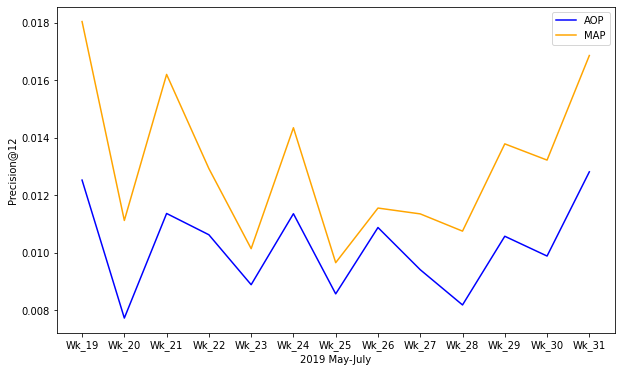

In [4]:
#plot for AOP MAP
plt.figure(figsize=(10,6))
plt.plot(userCF_df.timeline, userCF_df.AOP, color= 'blue')
plt.plot(userCF_df.timeline, userCF_df.MAP, color= 'orange')
plt.xlabel('2019 May-July')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])

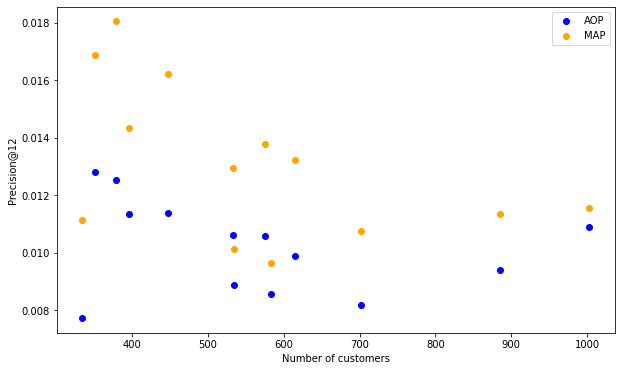

In [5]:
#scatter plot for AOP and number of users
plt.figure(figsize=(10,6))
plt.scatter(userCF_df.num_users, userCF_df.AOP, color = 'blue')
plt.scatter(userCF_df.num_users, userCF_df.MAP, color = 'orange')
plt.xlabel('Number of customers')
plt.ylabel('Precision@12')
plt.legend(['AOP','MAP'])